<a href="https://colab.research.google.com/github/KenDaupsey/Propensity-Score-Matching-Using-Python/blob/main/Propensity_Score_Matching_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Propensity Score Matching Using Python ***

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Importing the dataset and displaying the first 5 rows

csv= "Propensity Score~Dataset.csv"
df= pd.read_csv(csv)
df.head()

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome
0,1,57,0,1,1,144.300417
1,2,27,1,1,0,84.993181
2,3,65,0,1,0,158.664036
3,4,60,0,0,0,148.263475
4,5,46,1,2,0,120.771806


In [3]:
# Step 3: Exploring the data~1
df.describe()  # Displaying the data types of the columns

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,53.824100,0.651000,0.807600,0.500400,138.977511
std,2886.89568,20.993524,0.476678,0.817587,0.500025,42.057306
min,1.00000,18.000000,0.000000,0.000000,0.000000,59.998923
25%,2500.75000,36.000000,0.000000,0.000000,0.000000,102.658691
50%,5000.50000,54.000000,1.000000,1.000000,1.000000,138.953228
75%,7500.25000,72.000000,1.000000,2.000000,1.000000,175.180812
max,10000.00000,90.000000,1.000000,2.000000,1.000000,217.804103


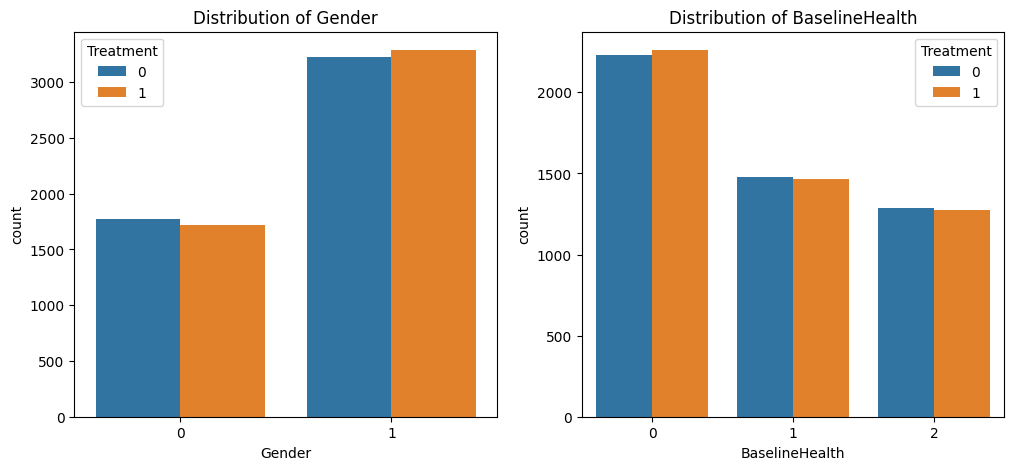

In [5]:
# Step 4: Visualizing the distribution of covariates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='Gender', hue='Treatment', data=df, ax=axes[0])  # Visualizing the distribution of Gender
axes[0].set_title('Distribution of Gender')

sns.countplot(x='BaselineHealth', hue='Treatment', data=df, ax=axes[1])  # Visualizing the distribution of BaselineHealth
axes[1].set_title('Distribution of BaselineHealth')

plt.show()

In [8]:
# Propensity Score Model using KNN

# Features (covariates) for the model
X = df[["Age", "Gender", "BaselineHealth"]]
# Target variable (treatment assignment)
y = df["Treatment"]

# Initializing and fitting the logistic regression model on all data
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

# Predicting propensity scores for all observations
df["PropensityScore_LogReg"] = log_reg_model.predict_proba(X)[:, 1]
df

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg
0,1,57,0,1,1,144.300417,0.491009
1,2,27,1,1,0,84.993181,0.508164
2,3,65,0,1,0,158.664036,0.489837
3,4,60,0,0,0,148.263475,0.493786
4,5,46,1,2,0,120.771806,0.502164
...,...,...,...,...,...,...,...
9995,9996,61,1,1,1,154.535378,0.503184
9996,9997,26,0,0,0,82.719155,0.498766
9997,9998,46,1,0,1,126.705432,0.508597
9998,9999,34,1,0,0,100.473584,0.510355


In [9]:
# Propensity Score Model using KNN

# Initializing and fitting the KNN model on all data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

# Predicting propensity scores for all observations
df["PropensityScore_KNN"] = knn_model.predict_proba(X)[:, 1] #  The confidence 'ŷ' probability of the prediction is: " k (majority class neigbours ) / k  " , so the possible values are [0, 0.2, 0.4, 0.6, 0.8, 1]
df

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg,PropensityScore_KNN
0,1,57,0,1,1,144.300417,0.491009,0.8
1,2,27,1,1,0,84.993181,0.508164,0.6
2,3,65,0,1,0,158.664036,0.489837,0.4
3,4,60,0,0,0,148.263475,0.493786,0.2
4,5,46,1,2,0,120.771806,0.502164,0.4
...,...,...,...,...,...,...,...,...
9995,9996,61,1,1,1,154.535378,0.503184,0.6
9996,9997,26,0,0,0,82.719155,0.498766,0.6
9997,9998,46,1,0,1,126.705432,0.508597,0.8
9998,9999,34,1,0,0,100.473584,0.510355,0.6


In [15]:
df.groupby('PropensityScore_KNN')['Treatment'].value_counts()

PropensityScore_KNN  Treatment
0.0                  0             206
                     1             129
0.2                  0             804
                     1             632
0.4                  0            1545
                     1            1379
0.6                  1            1753
                     0            1608
0.8                  1             942
                     0             707
1.0                  1             169
                     0             126
Name: Treatment, dtype: int64

In [16]:
df.groupby('PropensityScore_LogReg')['Treatment'].value_counts()

PropensityScore_LogReg  Treatment
0.482963                0             8
                        1             5
0.483109                0             6
                        1             3
0.483255                1             5
                                     ..
0.512404                1            20
0.512551                0            21
                        1            20
0.512697                0            31
                        1            22
Name: Treatment, Length: 876, dtype: int64

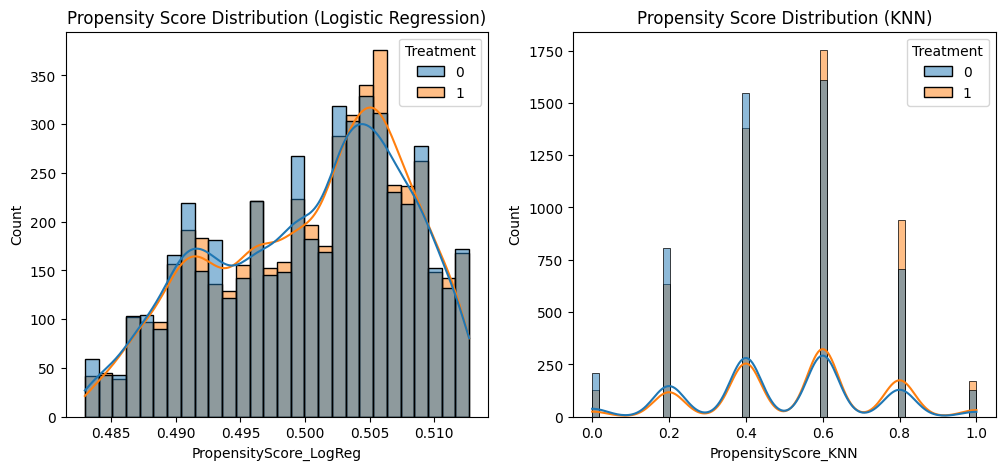

In [10]:
# Visualizing the Propensity Scores

# Creating subplots for visualizing the propensity score distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Visualizing the propensity score distribution from Logistic Regression
sns.histplot(df, x='PropensityScore_LogReg', hue='Treatment', kde=True, ax=axes[0])
axes[0].set_title('Propensity Score Distribution (Logistic Regression)')

# Visualizing the propensity score distribution from KNN
sns.histplot(df, x='PropensityScore_KNN', hue='Treatment', kde=True, ax=axes[1])
axes[1].set_title('Propensity Score Distribution (KNN)')

plt.show()

In [ ]:
# Propensity Score Matching

In [24]:
# Splitting the data into treated and control groups
treated = df[df["Treatment"] == 1]
control = df[df["Treatment"] == 0]

control

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg,PropensityScore_KNN
1,2,27,1,1,0,84.993181,0.508164,0.6
2,3,65,0,1,0,158.664036,0.489837,0.4
3,4,60,0,0,0,148.263475,0.493786,0.2
4,5,46,1,2,0,120.771806,0.502164,0.4
5,6,56,1,1,0,140.482059,0.503916,0.8
...,...,...,...,...,...,...,...,...
9990,9991,76,1,2,0,182.866029,0.497769,0.4
9992,9993,81,1,0,0,195.939004,0.503471,0.2
9993,9994,78,1,1,0,186.159871,0.500693,0.2
9996,9997,26,0,0,0,82.719155,0.498766,0.6


In [51]:
# NearestNeighbors is used to find the closest match for each treated unit from the control group based on propensity scores

# Initializing the NearestNeighbors model for matching
nn = NearestNeighbors(n_neighbors=1)
# Fitting the model on the control group's propensity scores
nn.fit(control[["PropensityScore_LogReg"]])

# Finding the nearest neighbors for each treated unit
# This returns the distances and indices of the nearest control units for each treated unit
distances, indices = nn.kneighbors(treated[["PropensityScore_LogReg"]])

indices.shape

(5004, 1)

In [23]:
# Getting the matched control samples
# Flattening the indices array to get a list of matched control indices
matched_control_indices = indices.flatten()
# Selecting the matched control samples from the control group
matched_control = control.iloc[matched_control_indices]

matched_control

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg,PropensityScore_KNN
563,564,57,0,1,0,143.018249,0.491009,0.8
233,234,23,1,0,0,78.187165,0.511965,0.4
160,161,53,1,0,0,139.165542,0.507572,0.6
875,876,63,1,0,0,158.387632,0.506108,0.8
223,224,32,1,0,0,97.654628,0.510647,0.6
...,...,...,...,...,...,...,...,...
721,722,66,1,1,0,163.298158,0.502451,0.6
7804,7805,48,1,1,0,125.540419,0.505088,0.6
1186,1187,61,1,1,0,152.919073,0.503184,0.6
4739,4740,46,1,0,0,124.944244,0.508597,0.8


In [52]:
treated # check visually the correspondence of the Nth row of matched_control with the Nth row of treated

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg,PropensityScore_KNN
0,1,57,0,1,1,144.300417,0.491009,0.8
6,7,23,1,0,1,82.113379,0.511965,0.4
7,8,53,1,0,1,140.338351,0.507572,0.6
8,9,63,1,0,1,159.156130,0.506108,0.8
9,10,32,1,0,1,99.270884,0.510647,0.6
...,...,...,...,...,...,...,...,...
9991,9992,66,1,1,1,164.742729,0.502451,0.6
9994,9995,48,1,1,1,128.760500,0.505088,0.6
9995,9996,61,1,1,1,154.535378,0.503184,0.6
9997,9998,46,1,0,1,126.705432,0.508597,0.8


In [80]:
# additional check of the correspondence of the Nth row of matched_control==treated with the Nth row of treated

matched_control[[matched_control.iloc[i]['PropensityScore_LogReg'] != treated.iloc[i]['PropensityScore_LogReg'] for i in range(len(treated))]] # all correspondent rows have the same PropensityScore_LogReg

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg,PropensityScore_KNN


In [98]:
# to accomplish the correspondence, the matched_control dataframe (5004 rows, as the treated dataframe) is created from the control dataframe (4996 rows) duplicating some of them.

print(matched_control.index.nunique()) # actually only 438 distinct rows selected from the control are present in the matched_control. This is because there are only 438 different PropensityScore_LogReg in the treated dataframe, and only the 438 correspondent rows with equal PropensityScore_LogReg are selected from the control

matched_control.PropensityScore_LogReg.nunique(), control.PropensityScore_LogReg.nunique(), treated.PropensityScore_LogReg.nunique(), 

438


(438, 438, 438)

In [107]:
# Evaluating the Outcome Effect:

print ('Treated Outcome Effect', treated["Outcome"].mean())
print ('Control Outcome Effect', control["Outcome"].mean())
print ('Matched Control Outcome Effect', matched_control["Outcome"].mean())


# # Calculating the average treatment effect
# effect = matched_df["Outcome"].mean() - control["Outcome"].mean()
# print(f"Average Treatment Effect: {effect}")

Treated Outcome Effect 139.73819503578738
Control Outcome Effect 138.21560878392313
Matched Control Outcome Effect 137.79503201764388


In [100]:
# Combining the treated and matched control groups
# This creates a new DataFrame with both treated units and their matched control units
matched_df = pd.concat([treated, matched_control])
matched_df

,SubjectID,Age,Gender,BaselineHealth,Treatment,Outcome,PropensityScore_LogReg,PropensityScore_KNN
0,1,57,0,1,1,144.300417,0.491009,0.8
6,7,23,1,0,1,82.113379,0.511965,0.4
7,8,53,1,0,1,140.338351,0.507572,0.6
8,9,63,1,0,1,159.156130,0.506108,0.8
9,10,32,1,0,1,99.270884,0.510647,0.6
...,...,...,...,...,...,...,...,...
721,722,66,1,1,0,163.298158,0.502451,0.6
7804,7805,48,1,1,0,125.540419,0.505088,0.6
1186,1187,61,1,1,0,152.919073,0.503184,0.6
4739,4740,46,1,0,0,124.944244,0.508597,0.8


In [111]:
# checking OLD (df) model statistics, before matching

# Initializing and fitting the logistic regression model using statsmodels
logit_model = sm.Logit(df['Treatment'], sm.add_constant(df[['Age', 'Gender', 'BaselineHealth']]))
logit_result = logit_model.fit()

# Displaying the summary of the logistic regression model
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.693038
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:               0.0001570
Time:                        14:49:24   Log-Likelihood:                -6930.4
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                    0.5367
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0102      0.065      0.158      0.875      -0.117       0.138
Age              

In [108]:
# checking NEW (matched_df) model statistics, after matching

# Initializing and fitting the logistic regression model using statsmodels
logit_model = sm.Logit(matched_df['Treatment'], sm.add_constant(matched_df[['Age', 'Gender', 'BaselineHealth']]))
logit_result = logit_model.fit()

# Displaying the summary of the logistic regression model
print(logit_result.summary())

# Pseudo R-squared: a low value indicates that the covariates explain very little of the variability in treatment assignment, suggesting good balance.
# Log-Likelihood: This value can be compared to the log-likelihood before matching to assess improvement in balance (it should decrease).
# Coefficients and P-values: The coefficients for Age, Gender, and BaselineHealth must be close to zero, and the p-values are all greater than 0.05, indicating that these covariates do not significantly predict treatment assignment after matching.

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                10008
Model:                          Logit   Df Residuals:                    10004
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:                   0.000
Time:                        14:10:35   Log-Likelihood:                -6937.0
converged:                       True   LL-Null:                       -6937.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const                   0      0.065          0      1.000      -0.128       0.128
Age              

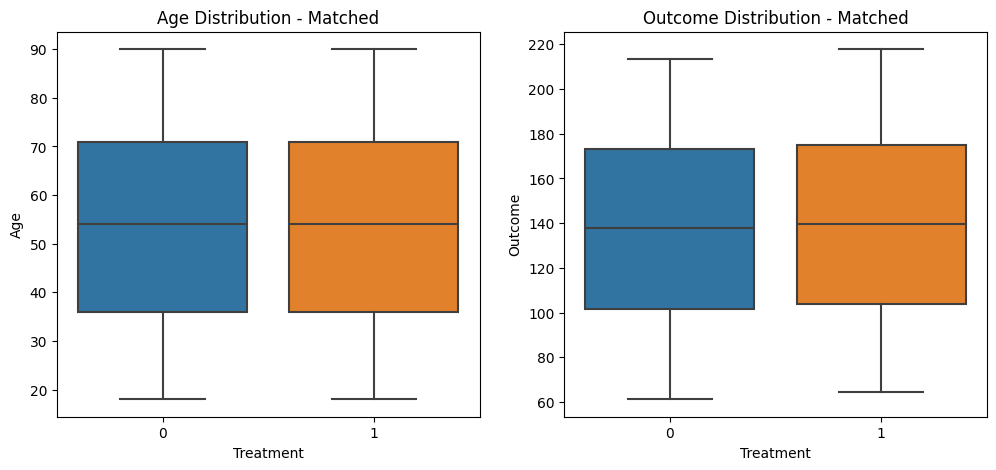

In [109]:
# Assessing Balance After Matching:

# Creating subplots for visualizing the distributions after matching
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Visualizing the age distribution after matching
sns.boxplot(x='Treatment', y='Age', data=matched_df, ax=axes[0])
axes[0].set_title('Age Distribution - Matched')

# Visualizing the outcome distribution after matching
sns.boxplot(x='Treatment', y='Outcome', data=matched_df, ax=axes[1])
axes[1].set_title('Outcome Distribution - Matched')

plt.show()